In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data=pd.read_csv('data1/weatherHistory.csv')

In [3]:
data.shape

(96453, 12)

In [4]:
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


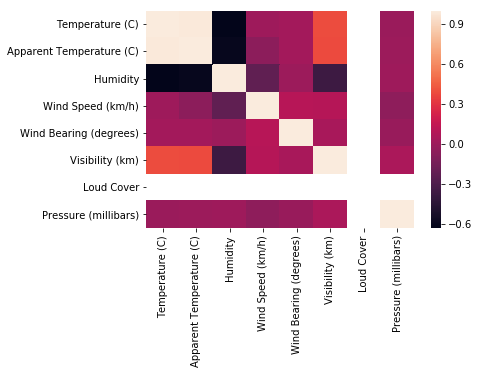

In [5]:
sns.heatmap(data.corr())

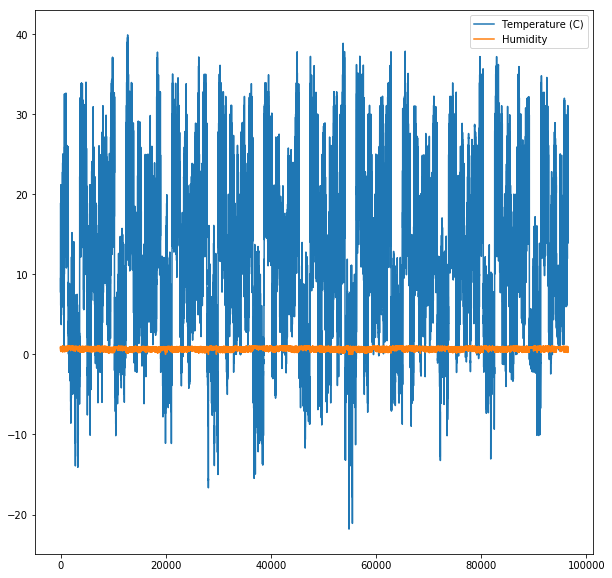

In [6]:
plt.figure(figsize=(10,10))
plt.plot(data['Temperature (C)'])
plt.plot(data['Humidity'])
plt.legend(['Temperature (C)','Humidity'])

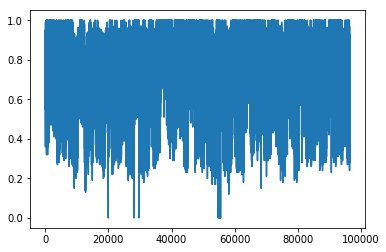

In [7]:
plt.figure()
plt.plot(data['Humidity'])

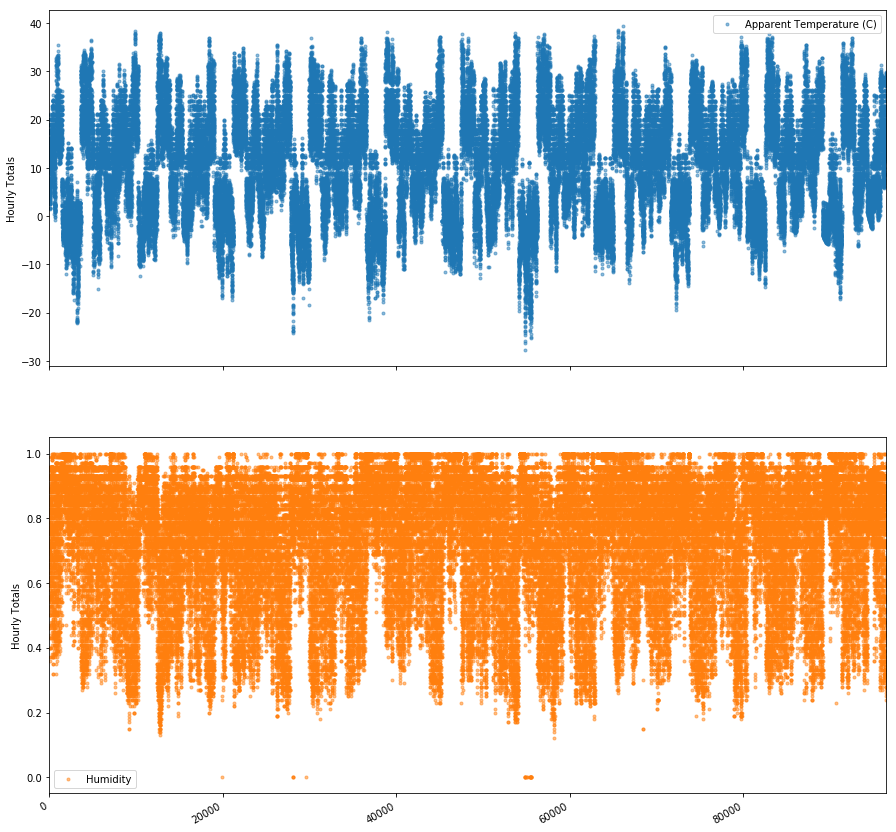

In [8]:
cols_plot = ['Apparent Temperature (C)', 'Humidity']

axes = data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(15, 16), subplots=True)
for ax in axes:
    ax.set_ylabel('Hourly Totals')

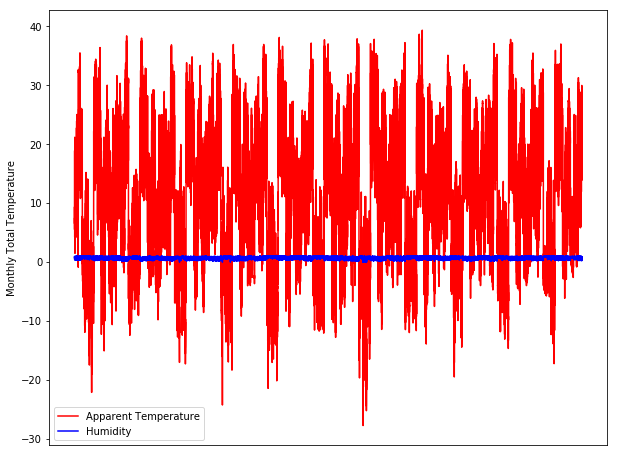

In [9]:
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(10,8))
# ax.plot(weather_monthly_mean['Temperature (C)'], color='black', label='Temperature')

ax.plot(data['Apparent Temperature (C)'], color='red', label='Apparent Temperature')

ax.plot(data['Humidity'], color='blue', label='Humidity')

#data[['Apparent Temperature (C)', 'Humidity']].plot.area(ax=ax, linewidth=0)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_ylabel('Monthly Total Temperature');

In [10]:
data_columns = ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity']


# Resample to weekly frequency, aggregating with mean
weather_monthly_mean = data[data_columns].mean()
weather_monthly_mean.tail(20)

Temperature (C)             11.932678
Apparent Temperature (C)    10.855029
Humidity                     0.734899
dtype: float64

In [11]:
data.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [12]:
data[data_columns].head()

,Temperature (C),Apparent Temperature (C),Humidity
0,9.472222,7.388889,0.89
1,9.355556,7.227778,0.86
2,9.377778,9.377778,0.89
3,8.288889,5.944444,0.83
4,8.755556,6.977778,0.83


(-3.95, 82.95, -0.6811666666666664, 22.224499999999992)

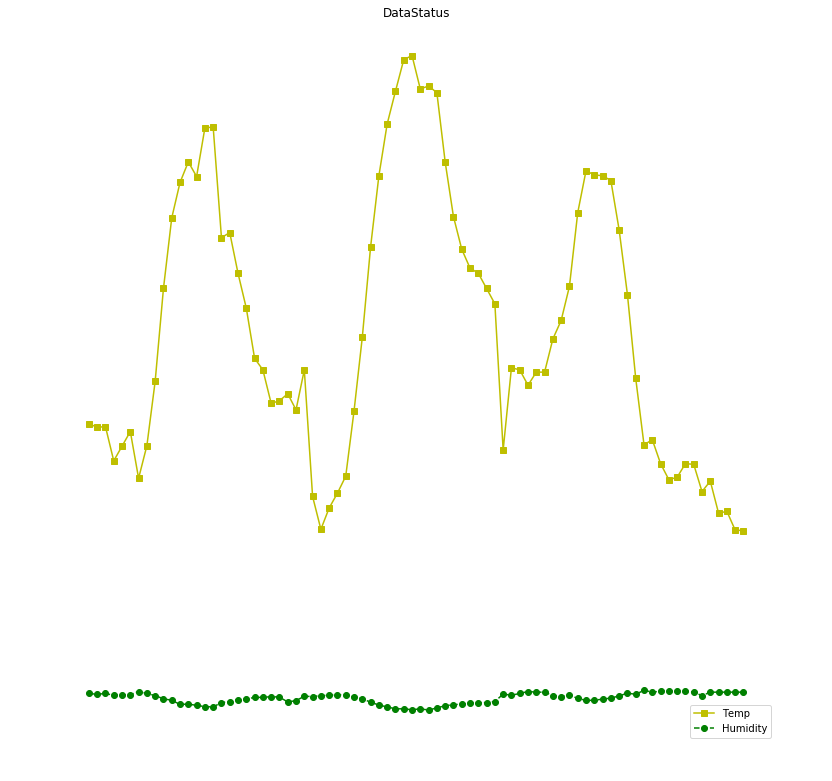

In [21]:
y = data['Formatted Date'][:80]
x1 = data['Temperature (C)'][:80]
x2 = data['Humidity'][:80]
fig = plt.figure(figsize=(10,10))
ax = fig.add_axes([0,0,1,1])
l1 = ax.plot(y,x1,'ys-') # solid line with yellow colour and square marker
l2 = ax.plot(y,x2,'go--') # dash line with green colour and circle marker
ax.legend(labels = ('Temp', 'Humidity'), loc = 'lower right') # legend placed at lower right
ax.set_title("DataStatus")
ax.set_ylabel('Monthly temp total')
ax.set_xlabel('Date')
ax.axis('off')

(-2.6, 54.6, -1.3021666666666667, 32.625499999999995)

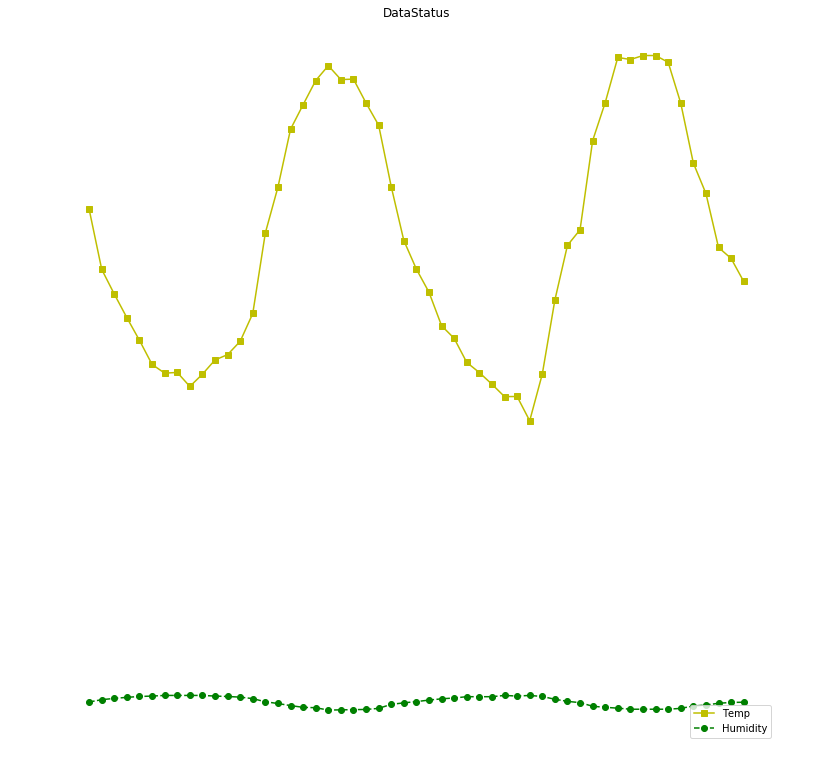

In [22]:
y = data['Formatted Date'][96400:]
x1 = data['Temperature (C)'][96400:]
x2 = data['Humidity'][96400:]
fig = plt.figure(figsize=(10,10))
ax = fig.add_axes([0,0,1,1])
l1 = ax.plot(y,x1,'ys-') # solid line with yellow colour and square marker
l2 = ax.plot(y,x2,'go--') # dash line with green colour and circle marker
ax.legend(labels = ('Temp', 'Humidity'), loc = 'lower right') # legend placed at lower right
ax.set_title("DataStatus")
ax.set_ylabel('Monthly temp total')
ax.set_xlabel('Date')
ax.axis('off')